In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn import metrics

In [2]:
dataset_path = '/content/drive/MyDrive/datasets/17Flowers/train'


dataset_train = image_dataset_from_directory(
    dataset_path,
    shuffle=True,
    subset='training',
    validation_split=0.2,
    seed=123,
    image_size=(224, 224)
)

dataset_validation = image_dataset_from_directory(
    dataset_path,
    shuffle=True,
    subset='validation',
    validation_split=0.2,
    seed=123,
    image_size=(224, 224)

)

Found 1020 files belonging to 17 classes.
Using 816 files for training.
Found 1020 files belonging to 17 classes.
Using 204 files for validation.


In [3]:
# image augmentation
idg = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

dataset_train_augmented = idg.flow_from_directory(
    dataset_path,
    shuffle=True,
    subset='training',
    target_size=(224, 224)
)

dataset_validation_augmented = idg.flow_from_directory(
    dataset_path,
    shuffle=True,
    subset='validation',
    target_size=(224, 224)

)

Found 823 images belonging to 17 classes.
Found 197 images belonging to 17 classes.


In [4]:
model = models.Sequential([
    layers.Rescaling(1./255,  input_shape=(224, 224,3)),
    layers.Conv2D(64, (3, 3), strides=(2, 2), activation='relu', padding='same', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3, 3), strides=(2, 2), activation='relu', padding='same'),
    layers.MaxPooling2D(),
    layers.Conv2D(265, (3, 3), strides=(2, 2), activation='relu', padding='same'),
    layers.MaxPooling2D(),

    layers.Flatten(),

    layers.Dense(1080, activation='relu'),
    layers.Dense(17, activation='softmax')
])

In [5]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [6]:
history = model.fit(dataset_train,
                    validation_data=dataset_validation,
                    epochs=20)

Epoch 1/20
26/26 [==============================] - 277s 8s/step - loss: 2.6151 - accuracy: 0.1250 - val_loss: 2.1900 - val_accuracy: 0.2451
Epoch 2/20
26/26 [==============================] - 3s 92ms/step - loss: 2.2128 - accuracy: 0.2537 - val_loss: 1.9575 - val_accuracy: 0.2696
Epoch 3/20
26/26 [==============================] - 5s 165ms/step - loss: 1.7925 - accuracy: 0.3395 - val_loss: 1.7708 - val_accuracy: 0.3676
Epoch 4/20
26/26 [==============================] - 4s 120ms/step - loss: 1.4413 - accuracy: 0.4951 - val_loss: 1.5388 - val_accuracy: 0.4314
Epoch 5/20
26/26 [==============================] - 3s 94ms/step - loss: 1.0783 - accuracy: 0.6225 - val_loss: 1.2281 - val_accuracy: 0.6029
Epoch 6/20
26/26 [==============================] - 3s 90ms/step - loss: 0.9157 - accuracy: 0.6924 - val_loss: 1.2036 - val_accuracy: 0.5833
Epoch 7/20
26/26 [==============================] - 4s 121ms/step - loss: 0.7013 - accuracy: 0.7610 - val_loss: 1.2353 - val_accuracy: 0.5784
Epoch 8/20

In [7]:
model = models.Sequential([
    layers.Conv2D(64, (3, 3), strides=(2, 2), activation='relu', padding='same', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3, 3), strides=(2, 2), activation='relu', padding='same'),
    layers.MaxPooling2D(),
    layers.Conv2D(265, (3, 3), strides=(2, 2), activation='relu', padding='same'),
    layers.MaxPooling2D(),

    layers.Flatten(),

    layers.Dense(1080, activation='relu'),
    layers.Dense(17, activation='softmax')
])

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy']
              )

In [9]:
history_augmented = model.fit(dataset_train_augmented,
                    validation_data=dataset_validation_augmented,
                    epochs=20)

Epoch 1/20
26/26 [==============================] - 20s 699ms/step - loss: 2.5984 - accuracy: 0.1239 - val_loss: 2.3722 - val_accuracy: 0.1320
Epoch 2/20
26/26 [==============================] - 18s 692ms/step - loss: 2.2204 - accuracy: 0.2479 - val_loss: 2.0250 - val_accuracy: 0.2944
Epoch 3/20
26/26 [==============================] - 16s 602ms/step - loss: 1.9247 - accuracy: 0.3402 - val_loss: 1.5780 - val_accuracy: 0.4010
Epoch 4/20
26/26 [==============================] - 18s 702ms/step - loss: 1.5905 - accuracy: 0.4374 - val_loss: 1.4673 - val_accuracy: 0.4924
Epoch 5/20
26/26 [==============================] - 16s 604ms/step - loss: 1.3129 - accuracy: 0.5541 - val_loss: 1.2849 - val_accuracy: 0.5025
Epoch 6/20
26/26 [==============================] - 15s 585ms/step - loss: 1.1841 - accuracy: 0.5966 - val_loss: 1.1965 - val_accuracy: 0.5381
Epoch 7/20
26/26 [==============================] - 15s 583ms/step - loss: 1.0873 - accuracy: 0.6330 - val_loss: 1.2141 - val_accuracy: 0.5787

In [13]:
X_vall, Y_vall = dataset_validation_augmented[0]

Y_pred = model.predict(X_vall)

Y_vall = np.argmax(Y_vall, axis=1)
Y_pred = np.argmax(Y_pred, axis=1)



1/1 [==============================] - 0s 200ms/step


In [ ]:
labels = ['bluebell',
 'buttercup',
 'coltsfoot',
 'cowslip',
 'crocus',
 'daffodil',
 'daisy',
 'dandelion',
 'fritillary',
 'iris',
 'lilyvalley',
 'pansy',
 'snowdrop',
 'sunflower',
 'tigerlily',
 'tulip',
 'windflower']

ValueError: The number of FixedLocator locations (16), usually from a call to set_ticks, does not match the number of labels (17).

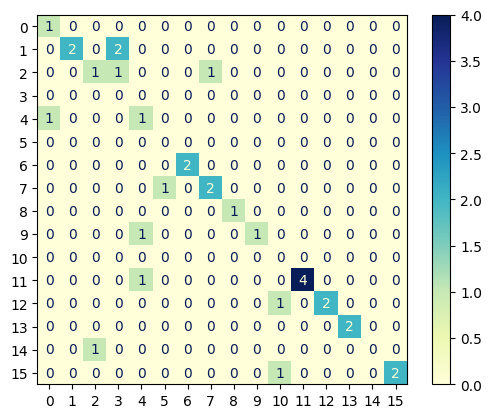

In [17]:
confusion_matrix = metrics.confusion_matrix(Y_pred, Y_vall)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = labels)

cm_display.plot(cmap='YlGnBu')
plt.show()

In [15]:
test_dataset_path = '/content/drive/MyDrive/datasets/17Flowers/test'


dataset_test = image_dataset_from_directory(
    test_dataset_path,
    shuffle=True,
    image_size=(224, 224)
)

Found 340 files belonging to 17 classes.


TypeError: unsupported operand type(s) for /: '_PrefetchDataset' and 'int'

In [14]:
model.evaluate(dataset_test)

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2066, in test_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2049, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2037, in run_step  **
        outputs = model.test_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1919, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 17) are incompatible
